In [ ]:
# --- Preprocessing

In [9]:
from pathlib import Path
import pandas as pd

# --- Путь к папке с train ---
text_path = Path("/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/data/train")

texts = []

for file_path in text_path.glob("*.txt"):
    text = file_path.read_text(encoding="utf-8", errors="ignore")
    
    author = file_path.stem.split("_")[0]  # берём первую часть имени файла до "_"
    
    texts.append({
        "author": author,
        "filename": file_path.name,
        "text": text
    })


df = pd.DataFrame(texts)
df = df.sort_values(by="author").reset_index(drop=True)

df.head()


,author,filename,text
0,lenin,lenin_les_beaux_esprits_I.txt,LES BEAUX ESPRITS SE RENCONTRENT \nЗнаменитая ...
1,lenin,lenin_padenie_port_artura.txt,Падение Порт-Артура\n \n“Порт-Артур капитулиро...
2,lenin,lenin_era_reform_I.txt,"ЭРА РЕФОРМ\n\nДа, мы переживаем, несомненно, э..."
3,lenin,lenin_rab_i_burzh_dem.txt,Рабочая и буржуазная демократия\n \nВопрос об ...
4,lenin,lenin_rec_parvus.txt,РЕЦЕНЗИЯ НА КНИГУ ПАРВУСА\n\nПарвус. Мировой р...


In [17]:
df["author"].value_counts()

author
lenin       48
plehanov    13
trotsky     12
martov       6
parvus       6
Name: count, dtype: int64

In [21]:
df["n_words"] = df["text"].str.split().str.len()
df[["author", "filename", "n_words"]].head()

,author,filename,n_words
0,lenin,lenin_les_beaux_esprits_I.txt,1032
1,lenin,lenin_padenie_port_artura.txt,2203
2,lenin,lenin_era_reform_I.txt,2011
3,lenin,lenin_rab_i_burzh_dem.txt,2461
4,lenin,lenin_rec_parvus.txt,440


In [23]:
df.groupby("author")["n_words"].describe()

,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
lenin,48.0,4354.416667,11085.442380,32.0,1066.5,1647.5,2273.75,63216.0
martov,6.0,1880.666667,834.584128,787.0,1255.0,1976.0,2565.75,2768.0
parvus,6.0,6326.333333,13332.696601,404.0,693.5,873.5,1451.75,33529.0
plehanov,13.0,2177.076923,829.708429,1013.0,1228.0,2254.0,2794.00,3368.0
trotsky,12.0,20821.416667,48099.383711,487.0,2024.5,3196.0,8863.25,170067.0


<Figure size 640x480 with 0 Axes>

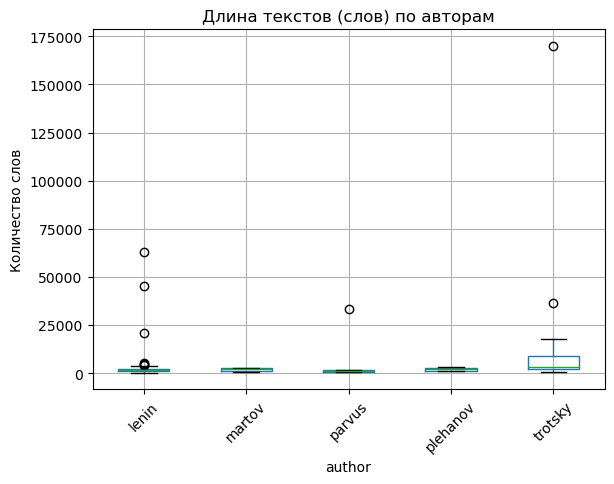

In [25]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column="n_words", by="author", rot=45)
plt.suptitle("")
plt.title("Длина текстов (слов) по авторам")
plt.ylabel("Количество слов")
plt.show()

In [29]:
df["n_words"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])


0.10     702.4
0.25    1136.0
0.50    1770.0
0.75    2768.0
0.90    5396.2
Name: n_words, dtype: float64

In [115]:
# Отфильтруем короткие тексты (<600 слов)

MIN_WORDS = 600

df_filtered = df[df["n_words"] >= MIN_WORDS].copy()

print("Было текстов:", len(df))
print("Стало текстов:", len(df_filtered))


Было текстов: 85
Стало текстов: 77


In [117]:
# Список исключенных из исследования текстов

df[df["n_words"] < MIN_WORDS][["author", "filename", "n_words"]]


,author,filename,n_words
4,lenin,lenin_rec_parvus.txt,440
8,lenin,lenin_rev_v_rossii.txt,145
19,lenin,lenin_tolstoy_i_prolet_borba.txt,324
29,lenin,lenin_iskra_quit.txt,32
32,lenin,lenin_proekt_ustava_rsdrp.txt,435
45,lenin,lenin_o_teorii_rynkov.txt,464
57,parvus,parvus_rus_and_rev_predislovie.txt,404
84,trotsky,trotsky_predisl_nasha_rev.txt,487


In [119]:
df_filtered.groupby("author")["n_words"].describe()


,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
lenin,42.0,4932.666667,11752.716667,742.0,1366.0,1743.5,2429.00,63216.0
martov,6.0,1880.666667,834.584128,787.0,1255.0,1976.0,2565.75,2768.0
parvus,5.0,7510.800000,14549.185156,676.0,746.0,1001.0,1602.00,33529.0
plehanov,13.0,2177.076923,829.708429,1013.0,1228.0,2254.0,2794.00,3368.0
trotsky,11.0,22670.000000,49997.979441,1387.0,2433.0,3398.0,11793.50,170067.0


In [61]:
## Tokenization

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

russian_stopwords = stopwords.words('russian')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anastasiabogdanova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# вывод списка стоп-слов. Посмотрев на него решено стандартные стоп-слова не удалять
print(russian_stopwords)


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [121]:
import re

# кастомные стоп-слова: римские числа
custom_stopwords = [
    'i', 'ii', 'iii', 'iv', 'v', 'vi', 'vii', 'viii', 'ix', 'x',
    'xi', 'xii', 'xiii', 'xiv', 'xv', 'xvi', 'xvii', 'xviii', 'xix', 'xx'
]


In [67]:
def clean_tokenizer(text):
   
    tokens = re.findall(r'\b\w+\b', text.lower())
    
    tokens = [
        t for t in tokens
        if re.search('[а-яё]', t)      
        and t not in custom_stopwords  # исключаем кастомные стоп-слова
        and not t.isdigit()            # исключаем любые числа
    ]
    
    return tokens

In [123]:
# Делим на чанки по 1000 слов

chunk_size = 1000
new_texts = []

for _, row in df_filtered.iterrows():
    words = row['text'].split()
    n_chunks = (len(words) + chunk_size - 1) // chunk_size
    for i in range(n_chunks):
        chunk = ' '.join(words[i*chunk_size : (i+1)*chunk_size])
        new_texts.append({
            "author": row["author"],
            "filename": f"{row['filename']}_chunk{i+1}",
            "text": chunk
        })

df_chunks = pd.DataFrame(new_texts)
print(f"Количество документов после разрезания: {len(df_chunks)}")

Количество документов после разрезания: 574


In [81]:
# Сохраняем
df_chunks.to_csv("/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/data/train_chunks.csv", index=False)



In [125]:
# DUBIA-тексты

from pathlib import Path
import pandas as pd
import re

# --- Путь к папке с dubia ---
text_path = Path("/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/data/dubia")

dubia_texts = []

for file_path in text_path.glob("*.txt"):
    text = file_path.read_text(encoding="utf-8", errors="ignore")
    
    author = file_path.stem.split("_")[0]
    
    # токенизация с кастомными стоп-словами
    tokens = re.findall(r'\b\w+\b', text.lower())
    tokens = [
        t for t in tokens
        if re.search('[а-яё]', t)       
        and t not in custom_stopwords   
        and not t.isdigit()            
    ]
    
    clean_text = " ".join(tokens)
    
    dubia_texts.append({
        "author": author,
        "filename": file_path.name,
        "text": clean_text
    })

df_dubia = pd.DataFrame(dubia_texts)

# сортировка по автору
df_dubia = df_dubia.sort_values(by="author").reset_index(drop=True)


df_dubia.head(10)


,author,filename,text
0,dubia,dubia_poslednee_slovo_bund_I.txt,последнее слово бундовского национализма загра...
1,dubia,dubia_priznaki_bankrotstva_I.txt,признаки банкротства всего только год прошел с...
2,dubia,dubia_novoe_poboishe_I.txt,новое побоище повидимому мы переживаем момент ...
3,dubia,dubia_ot_red_iskry_I.txt,заявление редакции искры от редакции предприни...
4,dubia,dubia_slovo_mosc_vedomostyam_I.txt,похвальное слово московским ведомостям жаль чт...
5,dubia,dubia_nasushnie_zadachi_I.txt,насущные задачи нашего движения русская социал...
6,dubia,dubia_zakon_o_voznagr_I.txt,закон о вознаграждении рабочих потерпевших от ...


In [127]:
# Проверяем размер dubia-текстов

df_dubia["n_words"] = df["text"].str.split().str.len()
df_dubia[["author", "filename", "n_words"]].head(10)

,author,filename,n_words
0,dubia,dubia_poslednee_slovo_bund_I.txt,1032
1,dubia,dubia_priznaki_bankrotstva_I.txt,2203
2,dubia,dubia_novoe_poboishe_I.txt,2011
3,dubia,dubia_ot_red_iskry_I.txt,2461
4,dubia,dubia_slovo_mosc_vedomostyam_I.txt,440
5,dubia,dubia_nasushnie_zadachi_I.txt,992
6,dubia,dubia_zakon_o_voznagr_I.txt,63216


In [111]:
# --- сохраняем на диск DUBIA_CLEAN.csv ---
df_dubia.to_csv(
    "/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/data/dubia_clean.csv",
    index=False
)